#imports

In [1]:
import numpy as np
#%tensorflow_version 1.x
# Sys
#from keras.utils.layer_utils import convert_all_kernels_in_model
from tensorflow import keras

import warnings
from keras.layers.convolutional import MaxPooling2D, Convolution2D, AveragePooling2D
from keras.layers import Input, Dropout, Dense, Flatten, Activation
from keras.layers import BatchNormalization
from keras.layers.merge import concatenate
from keras import regularizers
from keras import initializers
from keras.models import Model
# Backend
from keras import backend as backend
# Utils
from keras.utils.data_utils import get_file
import os
from os import listdir
import cv2
import pandas as pd
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#pre trained model

In [ ]:

v3model = tf.keras.applications.InceptionV3(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation=None,
)

96124928/96112376 [==============================] - 1s 0us/step


In [ ]:
x = v3model.output
x = Dense(512, activation='relu')(x)
fmodel = Dense(25, activation='softmax')(x)

In [ ]:
model = Model(inputs=v3model.input, outputs=fmodel)


#datagen

In [3]:
#creating data generator
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=40,
        shear_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
        ,)


valgen = ImageDataGenerator(
        rotation_range=40,
        shear_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [4]:
#fitting the traing data

trainingdata = r'/content/drive/MyDrive/myfinaldata299/train'

dir_list = os.listdir(trainingdata)
dir_list.sort()


trd = datagen.flow_from_directory( trainingdata, target_size= (299,299) , 

 class_mode="categorical" ,
 classes= dir_list)


Found 497 images belonging to 25 classes.


In [5]:
valdata = r'/content/drive/MyDrive/myfinaldata299/val'

dir_list = os.listdir(valdata)
dir_list.sort()


vdt = valgen.flow_from_directory( valdata, target_size= (299,299), class_mode="categorical" ,
 classes= dir_list)


Found 225 images belonging to 25 classes.


In [6]:
dir_list

['Abdulhadi',
 'Abdurrahman',
 'Ahmed',
 'Alhamza',
 'Ameer',
 'Baraa',
 'Basak',
 'Bilal',
 'CR7',
 'Eyad',
 'Hamdo',
 'Hamo',
 'Karim',
 'Kurnasan',
 'Mahasin',
 'Melike',
 'Nacho',
 'Nour',
 'Obada',
 'Oubaid',
 'Ram',
 'Safiye',
 'Sarah',
 'Vini',
 'Zeynep_bastik']

#training

In [14]:
from tensorflow.keras.optimizers import RMSprop , Adam , SGD
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.callbacks import CSVLogger


In [ ]:


cp = r"/content/drive/MyDrive/inceptionv3/model1.h5"
csvl = r'/content/drive/MyDrive/inceptionv3/model1.log'


#callbacks for early stopping and saving the best model

checkpoint = ModelCheckpoint(cp ,
                             monitor = "val_loss",
                             mode = "min" ,
                            save_best_only = True , verbose = 1)

earlystop = EarlyStopping (monitor = "val_loss" , min_delta = 0 ,
                           patience = 15 , restore_best_weights = True , 
                           verbose = 1)



csv_logger = CSVLogger(csvl, separator=',', append=False)



callbacks = [ checkpoint, earlystop , csv_logger]


model.compile(loss="categorical_crossentropy" , metrics = ["accuracy"] , 
                 optimizer =Adam(learning_rate = 0.0001))

history = model.fit(

trd,
epochs = 200,
validation_data=vdt,
callbacks = callbacks,
)
model.save(cp)


Epoch 1/200
16/16 [==============================] - ETA: 0s - loss: 2.7286 - accuracy: 0.2475 
Epoch 1: val_loss improved from inf to 3.55976, saving model to /content/drive/MyDrive/inceptionv3/model1.h5
16/16 [==============================] - 507s 31s/step - loss: 2.7286 - accuracy: 0.2475 - val_loss: 3.5598 - val_accuracy: 0.0444
Epoch 2/200
16/16 [==============================] - ETA: 0s - loss: 1.1065 - accuracy: 0.7384
Epoch 2: val_loss did not improve from 3.55976
16/16 [==============================] - 18s 1s/step - loss: 1.1065 - accuracy: 0.7384 - val_loss: 3.7950 - val_accuracy: 0.0622
Epoch 3/200
16/16 [==============================] - ETA: 0s - loss: 0.4597 - accuracy: 0.8793
Epoch 3: val_loss did not improve from 3.55976
16/16 [==============================] - 18s 1s/step - loss: 0.4597 - accuracy: 0.8793 - val_loss: 3.6406 - val_accuracy: 0.1200
Epoch 4/200
16/16 [==============================] - ETA: 0s - loss: 0.2155 - accuracy: 0.9577
Epoch 4: val_loss improved 

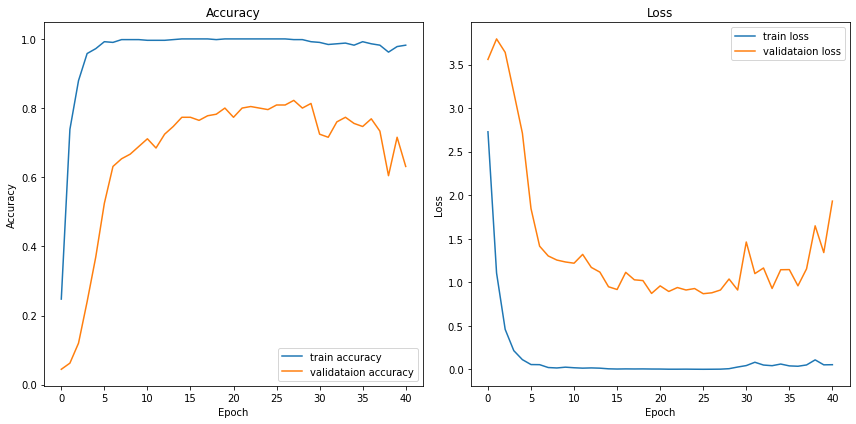

In [ ]:
import keras
from matplotlib import pyplot as plt

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs_range = range(41)

fig = plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label="train accuracy")
plt.plot(epochs_range, val_acc, label="validataion accuracy")
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label="train loss")
plt.plot(epochs_range, val_loss, label="validataion loss")
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc="upper right")

fig.tight_layout()
plt.show()


#no weights

In [ ]:

v3model2 = tf.keras.applications.InceptionV3(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=25,
    classifier_activation="softmax",
)

In [ ]:


cp = r"/content/drive/MyDrive/inceptionv3/model2.h5"
csvl = r'/content/drive/MyDrive/inceptionv3/model2.log'


#callbacks for early stopping and saving the best model

checkpoint = ModelCheckpoint(cp ,
                             monitor = "val_loss",
                             mode = "min" ,
                            save_best_only = True , verbose = 1)

earlystop = EarlyStopping (monitor = "val_loss" , min_delta = 0 ,
                           patience = 15 , restore_best_weights = True , 
                           verbose = 1)



csv_logger = CSVLogger(csvl, separator=',', append=False)



callbacks = [ checkpoint, earlystop , csv_logger]


v3model2.compile(loss="categorical_crossentropy" , metrics = ["accuracy"] , 
                 optimizer =Adam(learning_rate = 0.0001))

history = v3model2.fit(

trd,
epochs = 200,
validation_data=vdt,
callbacks = callbacks,
)
v3model2.save(cp)


Epoch 1/200
16/16 [==============================] - ETA: 0s - loss: 3.1553 - accuracy: 0.1529
Epoch 1: val_loss improved from inf to 3.22706, saving model to /content/drive/MyDrive/inceptionv3/model2.h5
16/16 [==============================] - 30s 1s/step - loss: 3.1553 - accuracy: 0.1529 - val_loss: 3.2271 - val_accuracy: 0.0400
Epoch 2/200
16/16 [==============================] - ETA: 0s - loss: 2.4707 - accuracy: 0.3320
Epoch 2: val_loss did not improve from 3.22706
16/16 [==============================] - 21s 1s/step - loss: 2.4707 - accuracy: 0.3320 - val_loss: 3.2708 - val_accuracy: 0.0400
Epoch 3/200
16/16 [==============================] - ETA: 0s - loss: 2.0405 - accuracy: 0.4326
Epoch 3: val_loss did not improve from 3.22706
16/16 [==============================] - 19s 1s/step - loss: 2.0405 - accuracy: 0.4326 - val_loss: 3.4095 - val_accuracy: 0.0400
Epoch 4/200
16/16 [==============================] - ETA: 0s - loss: 1.6063 - accuracy: 0.5775
Epoch 4: val_loss did not impr

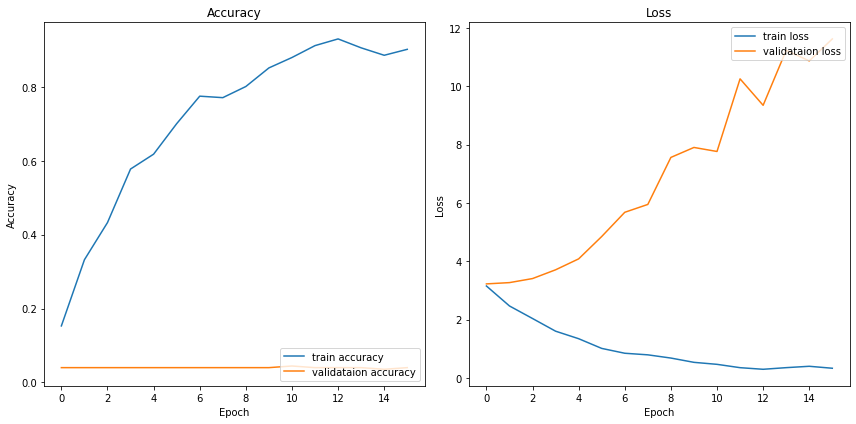

In [ ]:
import keras
from matplotlib import pyplot as plt

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs_range = range(16)

fig = plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label="train accuracy")
plt.plot(epochs_range, val_acc, label="validataion accuracy")
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label="train loss")
plt.plot(epochs_range, val_loss, label="validataion loss")
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc="upper right")

fig.tight_layout()
plt.show()


#3

transfer leaning and SGD Opt 

In [8]:

model3 = tf.keras.applications.InceptionV3(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

In [10]:
print("number of layers in the model : ", len(model3.layers))


number of layers in the model :  311


In [11]:
from keras.layers import Dropout, Dense, Flatten, GlobalAveragePooling2D
x = model3.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(25, activation='softmax')(x)

In [16]:


cp = r"/content/drive/MyDrive/inceptionv3/model3.h5"
csvl = r'/content/drive/MyDrive/inceptionv3/model3.log'


#callbacks for early stopping and saving the best model

checkpoint = ModelCheckpoint(cp ,
                             monitor = "val_loss",
                             mode = "min" ,
                            save_best_only = True , verbose = 1)

earlystop = EarlyStopping (monitor = "val_loss" , min_delta = 0 ,
                           patience = 15 , restore_best_weights = True , 
                           verbose = 1)



csv_logger = CSVLogger(csvl, separator=',', append=False)



callbacks = [ checkpoint, earlystop , csv_logger]




model = Model(inputs=model3.input, outputs=predictions)

# lock initial layers to not to be trained

for layer in model.layers[:52]:
    layer.trainable = False
    
# compile the model

model.compile(optimizer=SGD(learning_rate=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])



history = model.fit(

trd,
epochs = 200,
validation_data=vdt,
callbacks = callbacks,
)
model.save(cp)


Epoch 1/200
16/16 [==============================] - ETA: 0s - loss: 3.3229 - accuracy: 0.0443 
Epoch 1: val_loss improved from inf to 3.26820, saving model to /content/drive/MyDrive/inceptionv3/model3.h5
16/16 [==============================] - 449s 27s/step - loss: 3.3229 - accuracy: 0.0443 - val_loss: 3.2682 - val_accuracy: 0.0578
Epoch 2/200
16/16 [==============================] - ETA: 0s - loss: 3.2779 - accuracy: 0.0563
Epoch 2: val_loss improved from 3.26820 to 3.25499, saving model to /content/drive/MyDrive/inceptionv3/model3.h5
16/16 [==============================] - 19s 1s/step - loss: 3.2779 - accuracy: 0.0563 - val_loss: 3.2550 - val_accuracy: 0.0533
Epoch 3/200
16/16 [==============================] - ETA: 0s - loss: 3.2804 - accuracy: 0.0523
Epoch 3: val_loss did not improve from 3.25499
16/16 [==============================] - 18s 1s/step - loss: 3.2804 - accuracy: 0.0523 - val_loss: 3.3003 - val_accuracy: 0.0178
Epoch 4/200
16/16 [==============================] - ETA

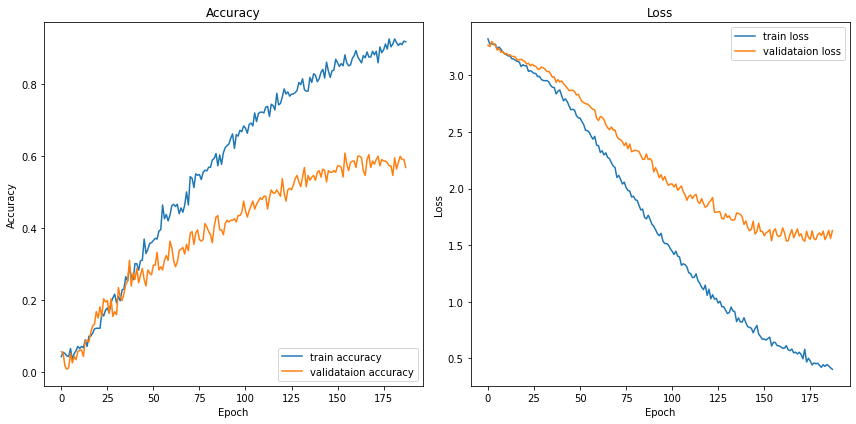

In [17]:
import keras
from matplotlib import pyplot as plt

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs_range = range(188)

fig = plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label="train accuracy")
plt.plot(epochs_range, val_acc, label="validataion accuracy")
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label="train loss")
plt.plot(epochs_range, val_loss, label="validataion loss")
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc="upper right")

fig.tight_layout()
plt.show()


#4

transfer leaning and Adam opt

In [18]:

model4 = tf.keras.applications.InceptionV3(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)


from keras.layers import Dropout, Dense, Flatten, GlobalAveragePooling2D
x = model4.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(25, activation='softmax')(x)




cp = r"/content/drive/MyDrive/inceptionv3/model4.h5"
csvl = r'/content/drive/MyDrive/inceptionv3/model4.log'


#callbacks for early stopping and saving the best model

checkpoint = ModelCheckpoint(cp ,
                             monitor = "val_loss",
                             mode = "min" ,
                            save_best_only = True , verbose = 1)

earlystop = EarlyStopping (monitor = "val_loss" , min_delta = 0 ,
                           patience = 15 , restore_best_weights = True , 
                           verbose = 1)



csv_logger = CSVLogger(csvl, separator=',', append=False)



callbacks = [ checkpoint, earlystop , csv_logger]




model = Model(inputs=model4.input, outputs=predictions)

# lock initial layers to not to be trained

for layer in model.layers[:52]:
    layer.trainable = False
    
# compile the model

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])



history = model.fit(

trd,
epochs = 500,
validation_data=vdt,
callbacks = callbacks,
)
model.save(cp)


Epoch 1/500
16/16 [==============================] - ETA: 0s - loss: 3.2267 - accuracy: 0.0805
Epoch 1: val_loss improved from inf to 3.23928, saving model to /content/drive/MyDrive/inceptionv3/model4.h5
16/16 [==============================] - 27s 1s/step - loss: 3.2267 - accuracy: 0.0805 - val_loss: 3.2393 - val_accuracy: 0.0444
Epoch 2/500
16/16 [==============================] - ETA: 0s - loss: 2.8531 - accuracy: 0.2294
Epoch 2: val_loss improved from 3.23928 to 3.22823, saving model to /content/drive/MyDrive/inceptionv3/model4.h5
16/16 [==============================] - 23s 1s/step - loss: 2.8531 - accuracy: 0.2294 - val_loss: 3.2282 - val_accuracy: 0.0622
Epoch 3/500
16/16 [==============================] - ETA: 0s - loss: 2.4180 - accuracy: 0.3823
Epoch 3: val_loss did not improve from 3.22823
16/16 [==============================] - 19s 1s/step - loss: 2.4180 - accuracy: 0.3823 - val_loss: 3.2415 - val_accuracy: 0.0756
Epoch 4/500
16/16 [==============================] - ETA: 0

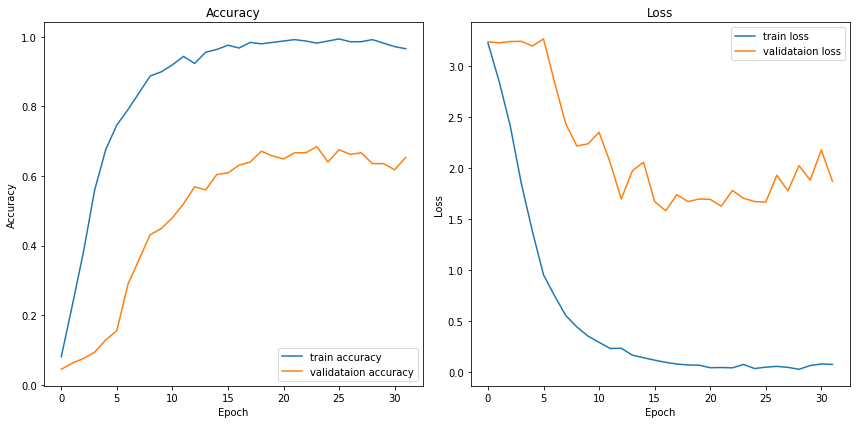

In [19]:
import keras
from matplotlib import pyplot as plt

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs_range = range(32)

fig = plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label="train accuracy")
plt.plot(epochs_range, val_acc, label="validataion accuracy")
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label="train loss")
plt.plot(epochs_range, val_loss, label="validataion loss")
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc="upper right")

fig.tight_layout()
plt.show()


#5

In [21]:

model5 = tf.keras.applications.InceptionV3(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation=None,
)


from keras.layers import Dropout, Dense, Flatten, GlobalAveragePooling2D
x = model5.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(25, activation='softmax')(x)




cp = r"/content/drive/MyDrive/inceptionv3/model5.h5"
csvl = r'/content/drive/MyDrive/inceptionv3/model5.log'


#callbacks for early stopping and saving the best model

checkpoint = ModelCheckpoint(cp ,
                             monitor = "val_loss",
                             mode = "min" ,
                            save_best_only = True , verbose = 1)

earlystop = EarlyStopping (monitor = "val_loss" , min_delta = 0 ,
                           patience = 15 , restore_best_weights = True , 
                           verbose = 1)



csv_logger = CSVLogger(csvl, separator=',', append=False)



callbacks = [ checkpoint, earlystop , csv_logger]




model = Model(inputs=model5.input, outputs=predictions)

# lock initial layers to not to be trained

for layer in model.layers[:52]:
    layer.trainable = False
    
# compile the model

model.compile(optimizer=SGD(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])



history = model.fit(

trd,
epochs = 500,
validation_data=vdt,
callbacks = callbacks,
)
model.save(cp)


Epoch 1/500
16/16 [==============================] - ETA: 0s - loss: 3.3541 - accuracy: 0.0402
Epoch 1: val_loss improved from inf to 3.27307, saving model to /content/drive/MyDrive/inceptionv3/model5.h5
16/16 [==============================] - 25s 1s/step - loss: 3.3541 - accuracy: 0.0402 - val_loss: 3.2731 - val_accuracy: 0.0533
Epoch 2/500
16/16 [==============================] - ETA: 0s - loss: 3.3148 - accuracy: 0.0402
Epoch 2: val_loss improved from 3.27307 to 3.25242, saving model to /content/drive/MyDrive/inceptionv3/model5.h5
16/16 [==============================] - 22s 1s/step - loss: 3.3148 - accuracy: 0.0402 - val_loss: 3.2524 - val_accuracy: 0.0311
Epoch 3/500
16/16 [==============================] - ETA: 0s - loss: 3.3183 - accuracy: 0.0423
Epoch 3: val_loss did not improve from 3.25242
16/16 [==============================] - 19s 1s/step - loss: 3.3183 - accuracy: 0.0423 - val_loss: 3.2574 - val_accuracy: 0.0311
Epoch 4/500
16/16 [==============================] - ETA: 0

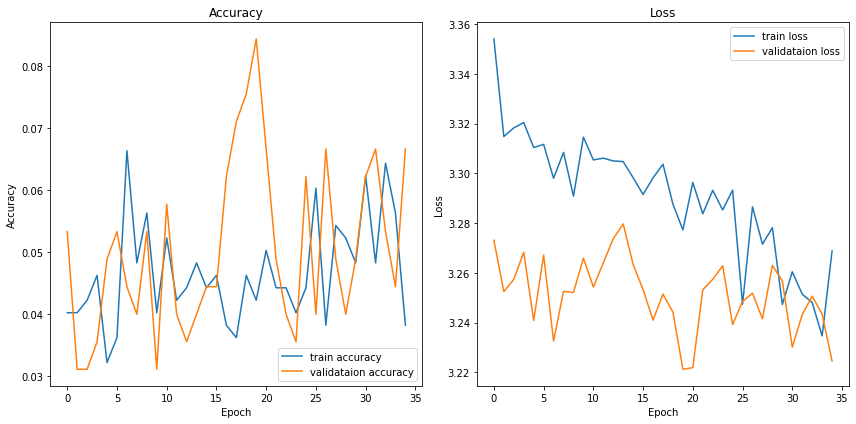

In [22]:
import keras
from matplotlib import pyplot as plt

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs_range = range(35)

fig = plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label="train accuracy")
plt.plot(epochs_range, val_acc, label="validataion accuracy")
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label="train loss")
plt.plot(epochs_range, val_loss, label="validataion loss")
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc="upper right")

fig.tight_layout()
plt.show()


#Notes for Canan hoca

In [ ]:
#link for the data

https://drive.google.com/drive/folders/1agO27jcK7EZUgzgQoGfMNw9TPvo1-y3k?usp=sharing

In [ ]:
#function to copy the whole data directory before working
from distutils.dir_util import copy_tree
copy_tree("path1", "target path")

In [ ]:
#resizing function (if needed)
import glob

for filename in glob.glob('/content/drive/path/*/*/*'): 
# /* means all folders then * all inside all folders then *.jpg all inside all folder ( train,test,val)
    print(filename)
    img=cv2.imread(filename)

    #cahnge target size
    img = cv2.resize(img, (244,244))

    cv2.imwrite(f'{filename}', img)
    

